In [1]:
#先引入后面可能用到的包（package）
import pandas as pd  
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

### 国内数据财经数据

### Tushare pro
使用方法：安装（进入cmd模式）：pip install tushare  
老版本：import tushare as ts; ts.get_k_data()获取股票行情数据还是挺好用的；
新版本tushare pro需要注册获取token才能使用，并且获取数据的权限受积分大小影响。 
[tushare pro注册链接地址](https://tushare.pro/register?reg=218422)

In [2]:
import tushare as ts
token='e0eeb08befd1f07516df2cbf9cbd58663f77fd72f92a04f290291c9d'
#ts.set_token(token)
pro = ts.pro_api(token)

In [3]:
start='20180101'
end='20181221'
df = ts.pro_bar(pro_api=pro, ts_code='000001.SH', asset='I', start_date=start,end_date=end)
df.head()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,000001.SH,20181221,2516.2506,2526.5535,2527.4214,2498.6937,2536.2675,-20.0169,-0.7892,115671200.0,101360622.8
1,000001.SH,20181220,2536.2675,2544.5054,2554.8586,2516.0193,2549.5634,-13.2959,-0.5215,120566496.0,103504982.7
2,000001.SH,20181219,2549.5634,2578.6750,2579.8743,2547.0783,2576.6495,-27.0861,-1.0512,107661797.0,93713175.0
3,000001.SH,20181218,2576.6495,2583.6343,2599.1479,2563.5731,2597.9737,-21.3242,-0.8208,117033370.0,99306536.4
4,000001.SH,20181217,2597.9737,2587.2632,2598.9670,2573.8674,2593.7406,4.2331,0.1632,117363250.0,102960848.5


#### 获取指数基本信息index_basic
必选输入参数：market ：(MSCI、CSI（中证指数)、SSE（上交所指数）、SZSE（深交所指数）、
CICC（中金所指数）、SW(申万指数)、CNI（国证指数）、OTH（其他指数）
如：上证系列指数   
sse_index=pro.index_basic(market='SSE')  
保存到本地  
sse_index.to_csv('./data/sse_index.csv',encoding='gbk')

In [6]:
market=['MSCI','CSI','SSE','SZSE','CICC','SW','CNI','OTH']
all_market_index={}
for m in market:
    all_market_index[m]=pro.index_basic(market=m)

In [7]:
all_market_index['SSE'].head()

,ts_code,name,market,publisher,category,base_date,base_point,list_date
0,000001.SH,上证综指,SSE,上交所,综合指数,19901219,100.00,19910715
1,000002.SH,上证A指,SSE,上交所,综合指数,19901219,100.00,19920221
2,000003.SH,上证B指,SSE,上交所,综合指数,19920221,100.00,19920221
3,000004.SH,上证工业类指数,SSE,上交所,综合指数,19930430,1358.78,19930503
4,000005.SH,上证商业类指数,SSE,上交所,综合指数,19930430,1358.78,19930503


In [8]:
def index_ts_code(name):
    sse_index=all_market_index['SSE']
    szse_index=all_market_index['SZSE']
    if name in list(sse_index.name.values):
        return sse_index[sse_index.name==name]
    else:
        return szse_index[szse_index.name==name]
index_ts_code('沪深300')

,ts_code,name,market,publisher,category,base_date,base_point,list_date
145,000300.SH,沪深300,SSE,中证公司,规模指数,20041231,1000.0,20050408


In [9]:
index_ts_code('深证成指')

,ts_code,name,market,publisher,category,base_date,base_point,list_date
0,399001.SZ,深证成指,SZSE,深交所,规模指数,19940720,1000.0,19950123


In [10]:
index_ts_code('创业板指')

,ts_code,name,market,publisher,category,base_date,base_point,list_date
5,399006.SZ,创业板指,SZSE,深交所,规模指数,20100531,1000.0,20100601


In [11]:
common_index=['上证综指','深证成指','沪深300','创业板指','上证50','中证500','中小板指','上证180']
import pandas as pd
indexs=index_ts_code(common_index[0]).T
for index_name in common_index:
    indexs[index_name]=index_ts_code(index_name).T
indexs=indexs.iloc[:,1:]

In [12]:
indexs

,上证综指,深证成指,沪深300,创业板指,上证50,中证500,中小板指,上证180
ts_code,000001.SH,399001.SZ,000300.SH,399006.SZ,000016.SH,000905.SH,399005.SZ,000010.SH
name,上证综指,深证成指,沪深300,创业板指,上证50,中证500,中小板指,上证180
market,SSE,SZSE,SSE,SZSE,SSE,SSE,SZSE,SSE
publisher,上交所,深交所,中证公司,深交所,上交所,中证公司,深交所,上交所
category,综合指数,规模指数,规模指数,规模指数,规模指数,规模指数,规模指数,规模指数
base_date,19901219,19940720,20041231,20100531,20031231,20041231,20050607,20020628
base_point,100,1000,1000,1000,1000,1000,1000,3299.06
list_date,19910715,19950123,20050408,20100601,20040102,20070115,20060124,20020701


In [14]:
index_dict=dict(indexs.loc['ts_code'])
index_dict

{'上证综指': '000001.SH',
 '深证成指': '399001.SZ',
 '沪深300': '000300.SH',
 '创业板指': '399006.SZ',
 '上证50': '000016.SH',
 '中证500': '000905.SH',
 '中小板指': '399005.SZ',
 '上证180': '000010.SH'}

In [50]:
def get_data(code):
    df=pro.index_daily(ts_code=code)
    df.index=pd.to_datetime(df.trade_date)
    return df.close
def logreturn(data):
    data=data.sort_index()
    logret=pd.DataFrame()
    for code in data.columns:
        logret[code]=np.log(data[code]/data[code].shift(1))
        logret.index=data.index
    return logret[1:]

In [51]:
df=pd.DataFrame()
df['上证指数']=get_data('000001.SH')
for name,code in index_dict.items():
    df[name]=get_data(code)
df=df.iloc[:,1:]

In [52]:
df.head()

,上证综指,深证成指,沪深300,创业板指,上证50,中证500,中小板指,上证180
trade_date,,,,,,,,
2018-12-21,2516.2506,7337.5975,3029.3951,1270.3043,2306.1451,4231.1440,4769.6576,6846.1136
2018-12-20,2536.2675,7426.4407,3067.4169,1278.1573,2334.9217,4259.7614,4846.3292,6918.1071
2018-12-19,2549.5634,7418.6926,3091.1255,1268.8139,2369.5483,4247.8991,4849.9088,6986.0282
2018-12-18,2576.6495,7530.3247,3128.4265,1293.3351,2397.8676,4307.2675,4935.9795,7063.9885
2018-12-17,2597.9737,7592.6462,3161.1966,1299.1747,2425.9446,4330.6465,4978.3653,7134.9957


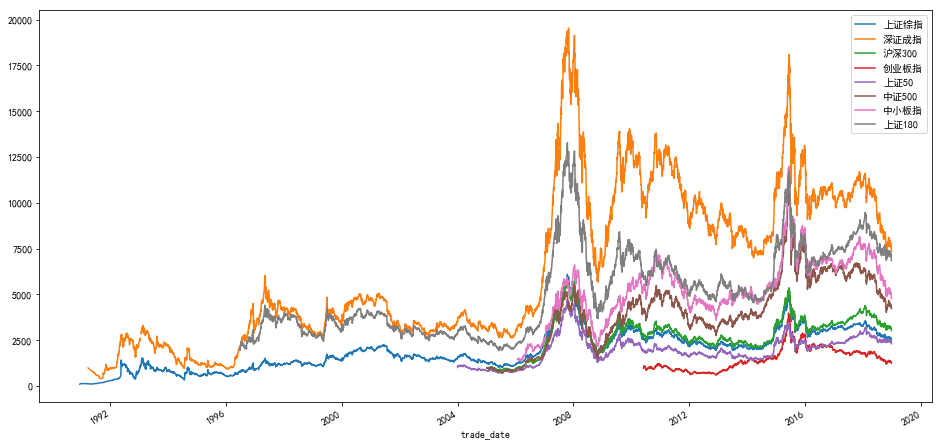

In [41]:
df.plot(figsize=(16,8))

In [53]:
logret=logreturn(df)
logret.head()

,上证综指,深证成指,沪深300,创业板指,上证50,中证500,中小板指,上证180
trade_date,,,,,,,,
1990-12-20,0.043164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-12-21,0.044406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-12-24,0.048472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-12-25,0.048562,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-12-26,0.040898,NaN,NaN,NaN,NaN,NaN,NaN,NaN


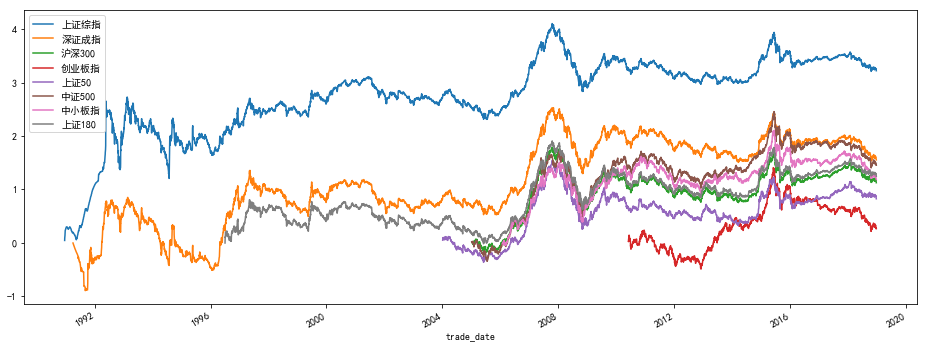

In [54]:
logret.cumsum().plot(figsize=(16,6))

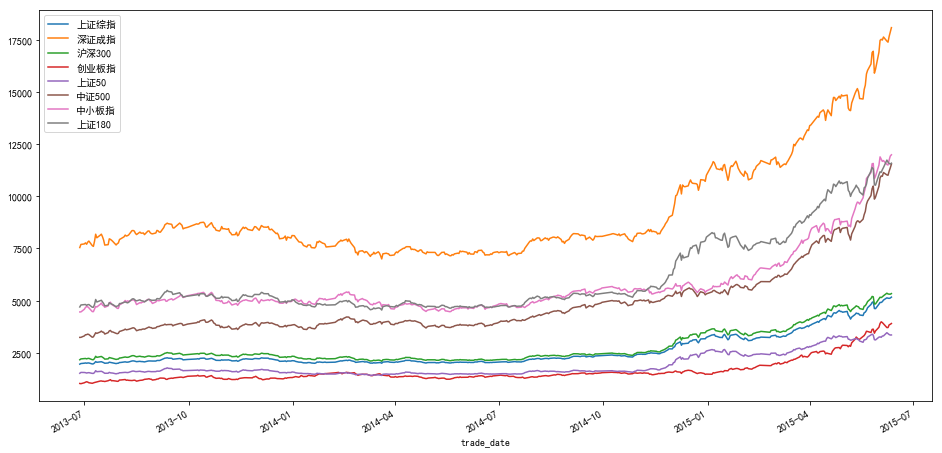

In [46]:
df=df.sort_index()
df[start:end].plot(figsize=(16,8))

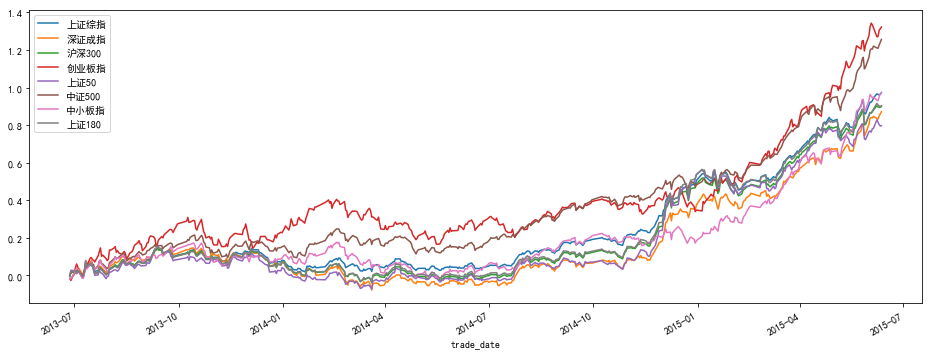

In [59]:
start='2013-06-27'
end='2015-06-12'
logret.loc[start:end].cumsum().plot(figsize=(16,6))

In [58]:
logret.loc[start:end].cumsum().iloc[-1]

上证综指     0.973571
深证成指     0.872100
沪深300    0.900368
创业板指     1.322665
上证50     0.797135
中证500    1.256714
中小板指     0.972557
上证180    0.903720
Name: 2015-06-12 00:00:00, dtype: float64

In [19]:
pro.index_daily(ts_code='399300.SZ').head()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,399300.SZ,20181221,3029.3951,3055.3258,3057.4007,3007.6096,3067.4169,-38.0218,-1.2395,76758101.0,84824064.7
1,399300.SZ,20181220,3067.4169,3083.5441,3097.7202,3044.2929,3091.1255,-23.7086,-0.7670,69749463.0,78181426.5
2,399300.SZ,20181219,3091.1255,3133.7416,3137.0099,3086.7579,3128.4265,-37.3010,-1.1923,55522299.0,67872922.4
3,399300.SZ,20181218,3128.4265,3139.9493,3165.0018,3114.4684,3161.1966,-32.7701,-1.0366,63820319.0,72035451.4
4,399300.SZ,20181217,3161.1966,3158.2844,3167.5125,3134.3653,3165.9109,-4.7143,-0.1489,66497007.0,77151490.8


In [20]:
pro.index_daily(ts_code='000300.SH').head()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,000300.SH,20181221,3029.3951,3055.3258,3057.4007,3007.6096,3067.4169,-38.0218,-1.2395,76758101.0,8.482406e+07
1,000300.SH,20181220,3067.4169,3083.5441,3097.7202,3044.2929,3091.1255,-23.7086,-0.7670,69749463.0,7.818143e+07
2,000300.SH,20181219,3091.1255,3133.7416,3137.0099,3086.7579,3128.4265,-37.3010,-1.1923,55522299.0,6.787292e+07
3,000300.SH,20181218,3128.4265,3139.9493,3165.0018,3114.4684,3161.1966,-32.7701,-1.0366,63820319.0,7.203545e+07
4,000300.SH,20181217,3161.1966,3158.2844,3167.5125,3134.3653,3165.9109,-4.7143,-0.1489,66497007.0,7.715149e+07


In [12]:
####指数日线行情
#start_date='' ,end_date=''
sh=pro.index_daily(ts_code='000001.SH')
sh.head()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,000001.SH,20181221,2516.2506,2526.5535,2527.4214,2498.6937,2536.2675,-20.0169,-0.7892,115671200.0,101360622.8
1,000001.SH,20181220,2536.2675,2544.5054,2554.8586,2516.0193,2549.5634,-13.2959,-0.5215,120566496.0,103504982.7
2,000001.SH,20181219,2549.5634,2578.6750,2579.8743,2547.0783,2576.6495,-27.0861,-1.0512,107661797.0,93713175.0
3,000001.SH,20181218,2576.6495,2583.6343,2599.1479,2563.5731,2597.9737,-21.3242,-0.8208,117033370.0,99306536.4
4,000001.SH,20181217,2597.9737,2587.2632,2598.9670,2573.8674,2593.7406,4.2331,0.1632,117363250.0,102960848.5


#### 个股情况  
pro.daily(ts_code= 或 trade_date=)  
日行情：daily;周行情：weekly;月行情：monthly

In [13]:
df = pro.daily(ts_code='000001.SZ', start_date='20181201', end_date='20181220')
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20181220,9.92,9.97,9.63,9.71,9.94,-0.23,-2.3139,990284.79,964202.861
1,000001.SZ,20181219,10.14,10.18,9.90,9.94,10.12,-0.18,-1.7787,598007.01,600090.171
2,000001.SZ,20181218,10.20,10.32,10.10,10.12,10.29,-0.17,-1.6521,537744.30,547157.562
3,000001.SZ,20181217,10.16,10.33,10.10,10.29,10.17,0.12,1.1799,571274.87,584679.512
4,000001.SZ,20181214,10.34,10.35,10.16,10.17,10.39,-0.22,-2.1174,526675.13,539263.012


In [14]:
#获取某一天所有交易股票行情
df = pro.daily(trade_date='20181220')
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20181220,9.92,9.97,9.63,9.71,9.94,-0.23,-2.3139,990284.79,964202.861
1,000002.SZ,20181220,25.45,25.80,24.91,25.30,25.38,-0.08,-0.3152,412249.80,1038244.109
2,000004.SZ,20181220,16.49,16.64,16.30,16.44,16.43,0.01,0.0609,2478.00,4080.480
3,000005.SZ,20181220,2.85,2.89,2.84,2.86,2.87,-0.01,-0.3484,26367.00,7550.903
4,000006.SZ,20181220,5.45,5.50,5.40,5.45,5.49,-0.04,-0.7286,108759.50,59263.807


1、平台：万矿  
万矿是wind推出的开源平台，全面支持python，接口是Windpy，注册地址为：
[万矿注册链接](https://www.windquant.com/qntcloud/apply?u=bcece678-b05c-4149-a6af-50a3a54ec1af&t=2)

In [65]:
from WindPy import *
from datetime import *
if w.isconnected()!=1:
    w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


In [66]:
wdata=w.wsd("000001.SH", "open,high,low,close",  
                "1990-12-20", "2018-12-20")
df=pd.DataFrame(wdata.Data,index=wdata.Fields,columns=wdata.Times).T
df.index=pd.to_datetime(df.index)
df.head()

,OPEN,HIGH,LOW,CLOSE
1990-12-20,104.30,104.39,99.98,104.39
1990-12-21,109.07,109.13,103.73,109.13
1990-12-24,113.57,114.55,109.13,114.55
1990-12-25,120.09,120.25,114.55,120.25
1990-12-26,125.27,125.27,120.25,125.27


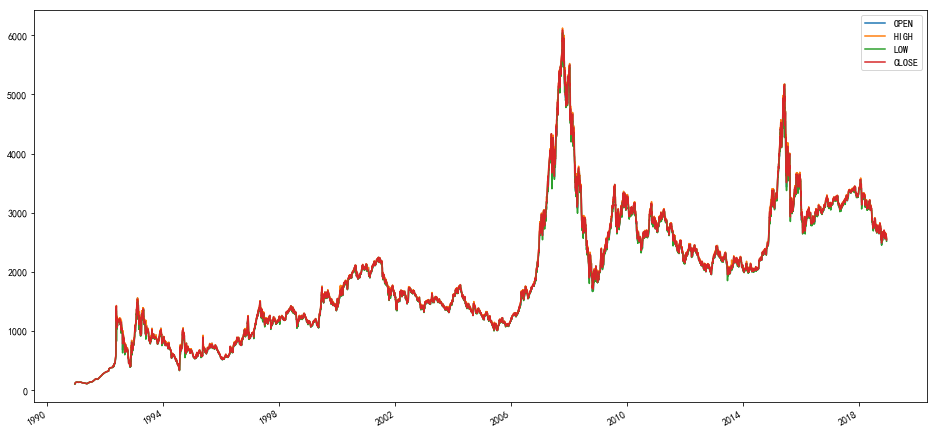

In [67]:
df.plot(figsize=(16,8))

### 证券宝
免费、开源的证券数据平台。 提供大量准确、完整的证券历史行情数据、上市公司财务数据等。 通过python API获取证券数据信息，满足量化交易投资者、数量金融爱好者、计量经济从业者数据需求。 返回的数据格式： pandas DataFrame类型，以便于用pandas/NumPy/Matplotlib进行数据分析和可视化。
[证券宝链接地址](http://baostock.com/baostock/index.php/Python_API文档)

In [2]:
import baostock as bs
#### 登陆系统 ####
lg = bs.login()

login success!


In [21]:
#### 获取历史K线数据 ####
# query_history_k_data()
fields= "date,code,open,high,low,close"
#,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,peTTM,pbMRQ,psTTM,pcfNcfTTM,isST
rs = bs.query_history_k_data("sh.000001", fields,
    start_date='2000-01-01', end_date='2018-09-07', 
    frequency="d", adjustflag="2") 
#frequency="d"取日k线，adjustflag="3"默认不复权，1：后复权；2：前复权

In [22]:
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)
#### 结果集输出到csv文件 ####
#result.to_csv("c:/zjy/history_k_data.csv", encoding="gbk", index=False)
result.head()
#### 登出系统 ####
#bs.logout()

,date,code,open,high,low,close
0,2006-01-04,sh.000001,1163.8780,1181.0040,1161.9060,1180.9630
1,2006-01-05,sh.000001,1183.3050,1197.8370,1180.4510,1197.2690
2,2006-01-06,sh.000001,1198.8110,1215.5360,1191.6140,1209.4220
3,2006-01-09,sh.000001,1210.3200,1217.3140,1205.2480,1215.6680
4,2006-01-10,sh.000001,1215.8480,1220.7560,1203.6510,1220.6180


In [28]:
result.index=pd.to_datetime(result.date)

In [29]:
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3086 entries, 2006-01-04 to 2018-09-07
Data columns (total 6 columns):
date     3086 non-null object
code     3086 non-null object
open     3086 non-null object
high     3086 non-null object
low      3086 non-null object
close    3086 non-null object
dtypes: object(6)
memory usage: 168.8+ KB


In [42]:
result=result.apply(pd.to_numeric, errors='ignore')
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3086 entries, 2006-01-04 to 2018-09-07
Data columns (total 6 columns):
date     3086 non-null object
code     3086 non-null object
open     3086 non-null float64
high     3086 non-null float64
low      3086 non-null float64
close    3086 non-null float64
dtypes: float64(4), object(2)
memory usage: 168.8+ KB


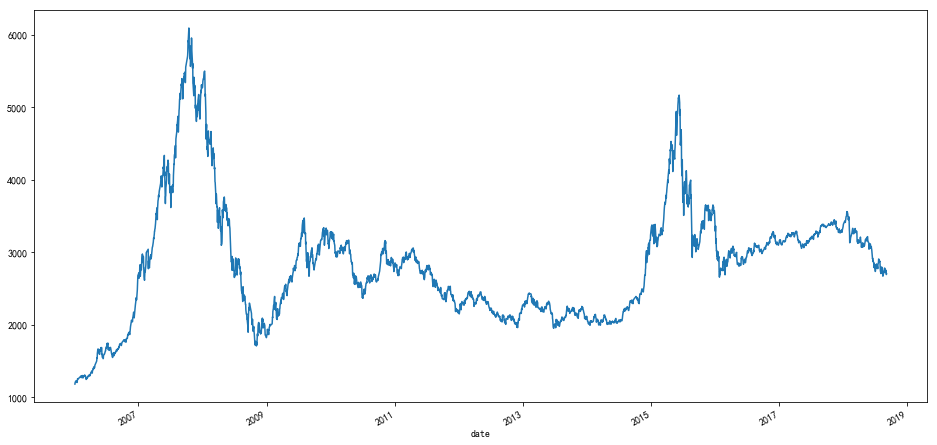

In [43]:
result.close.plot(figsize=(16,8))

### 获取国外交易数据
pandas_datareader是一个远程获取金融数据的Python工具，通过它可以方便获得下面公司和机构的数据：
Yahoo! Finance//雅虎金融
Google Finance//谷歌金融
Enigma//Enigma是一个公共数据搜索的提供商
St.Louis FED (FRED)//圣路易斯联邦储备银行
Kenneth French’s data library//肯尼斯弗兰奇资料库
World Bank//世界银行
OECD//经合组织
Eurostat//欧盟统计局
Thrift Savings Plan//美国联邦政府管理离退休的组织
Oanda currency historical rate  //外汇经纪商
Nasdaq Trader symbol definitions //纳斯达克
pandas-datareader安装非常简单：
$ pip install pandas-datareader

In [2]:
from datetime import datetime  
import pandas_datareader.data as web  
import fix_yahoo_finance as fy
fy.pdr_override()

In [70]:
def get_data(tick,start_date="2000-01-01", end_date="2018-12-20"):
    data = fy.download(tick, start=start_date, end=end_date)
    return data

In [73]:
tickers=['AAPL', 'GOOG','AMZN','FB','^GSPC','^DJI','^IXIC']
all_data = {}
for ticker in tickers:
    all_data[ticker]=get_data(ticker)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


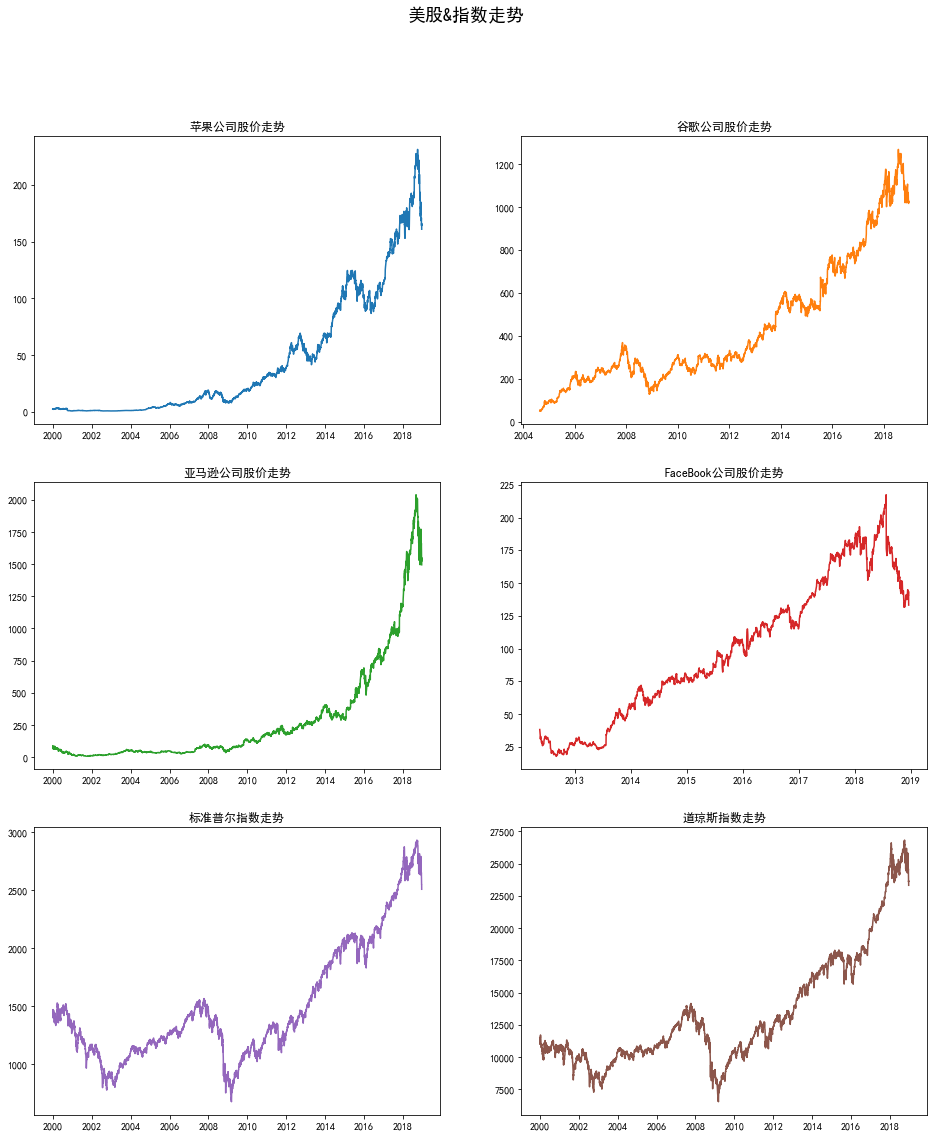

In [74]:
subjects = ['苹果公司股价走势','谷歌公司股价走势','亚马逊公司股价走势',
            'FaceBook公司股价走势','标准普尔指数走势','道琼斯指数走势','纳斯达克指数走势'] 
#每个子图的title
plot_pos = [321,322,323,324,325,326] # 每个子图的位置
new_colors = ['#1f77b4','#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f','#bcbd22','#17becf']

fig = plt.figure(figsize=(16,18))
fig.suptitle('美股&指数走势',fontsize=18)
for pos in np.arange(len(plot_pos)):       
    ax = fig.add_subplot(plot_pos[pos]) 
    y_data = all_data[tickers[pos]]['Adj Close']    
    b = ax.plot(y_data,color=new_colors[pos])   
    ax.set_title(subjects[pos])    
plt.show()    

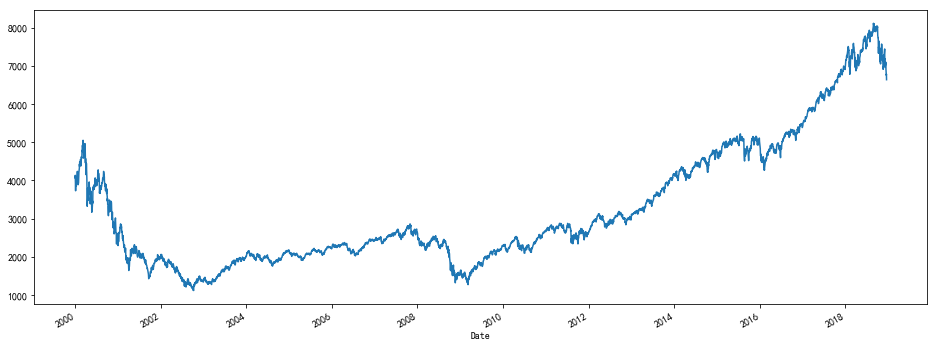

In [55]:
all_data['^IXIC']['Adj Close'].plot(figsize=(16,6))

In [84]:
WorldStockIndexList = {
    '000001.SS':'中国上证指数',
    '^DJI':'道琼斯工业平均指数',
    '^IXIC':'纳斯达克综合指数',
    '^N225':'日本日经225指数',
    '^HSI' :'香港恒生指数',
    '^FCHI':'法国CAC40指数', 
    '^FTSE':'英国富时100指数', 
    '^GDAXI':'德国法兰克福DAX指数'}

In [85]:
def get_data(tick,start_date="2000-01-01"):
    data = fy.download(tick, start=start_date, end=end_date)
    return data
world_data={}
for ticker in WorldStockIndexList.keys():
    world_data[ticker]=get_data(ticker)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


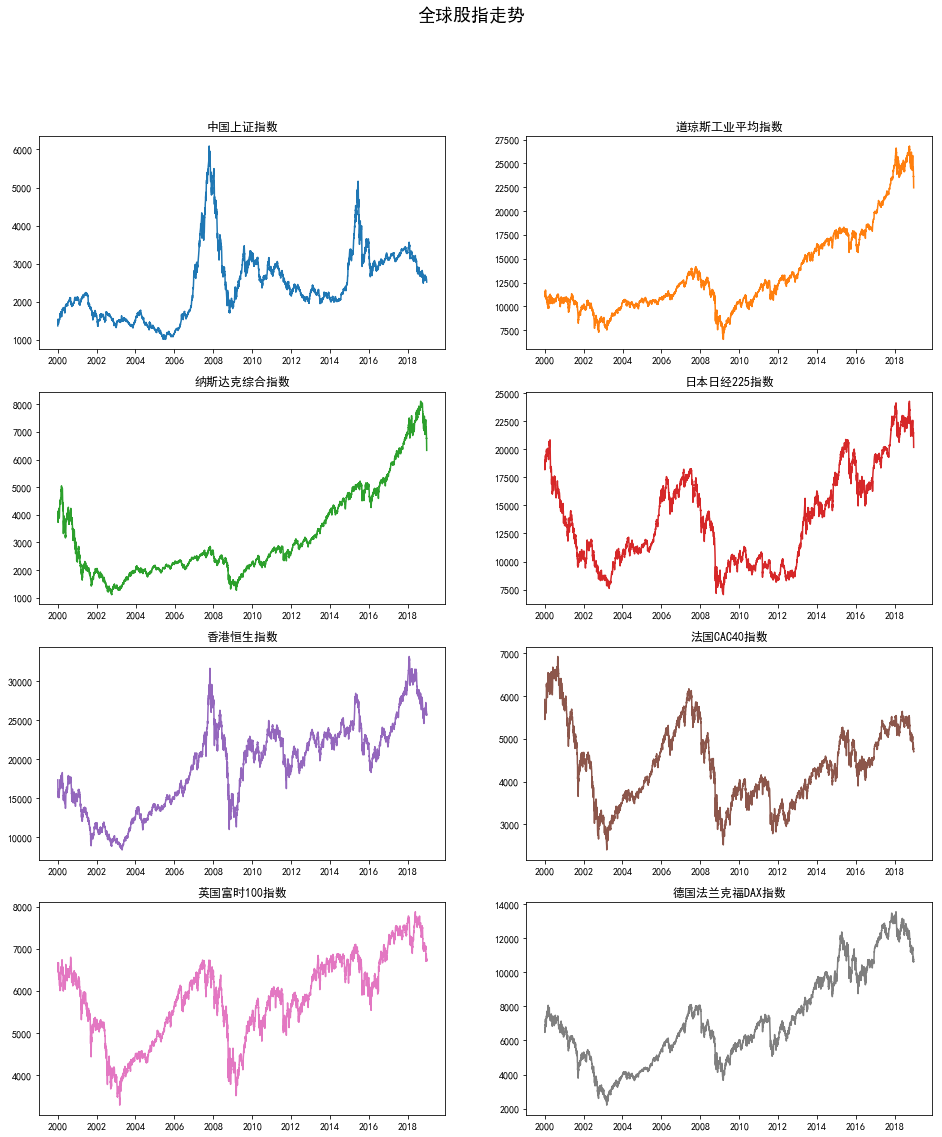

In [86]:
subjects =list(WorldStockIndexList.values())
tickers=list(WorldStockIndexList)
#每个子图的title
plot_pos = [421,422,423,424,425,426,427,428] # 每个子图的位置
new_colors = ['#1f77b4','#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f','#bcbd22','#17becf']

fig = plt.figure(figsize=(16,18))
fig.suptitle('全球股指走势',fontsize=18)
for pos in np.arange(len(plot_pos)):       
    ax = fig.add_subplot(plot_pos[pos]) 
    y_data =world_data[tickers[pos]]['Adj Close']    
    b = ax.plot(y_data,color=new_colors[pos])   
    ax.set_title(subjects[pos])    
plt.show()  

In [89]:
def logreturn(data):
    data=data.sort_index()
    logret=pd.DataFrame()
    for code in data.columns:
        logret[code]=np.log(data[code]/data[code].shift(1))
        logret.index=data.index
    return logret[1:]

In [101]:
dff=pd.DataFrame()
dff['上证指数']=world_data['000001.SS']['Adj Close']   
for code,data in world_data.items():
    dff[WorldStockIndexList[code]]=data['Adj Close'] 
dff=dff.iloc[:,1:]

In [102]:
dff

,中国上证指数,道琼斯工业平均指数,纳斯达克综合指数,日本日经225指数,香港恒生指数,法国CAC40指数,英国富时100指数,德国法兰克福DAX指数
Date,,,,,,,,
2000-01-03,1366.579956,11357.509766,4131.149902,NaN,17369.630859,5917.370117,NaN,6750.759766
2000-01-04,1406.370972,10997.929688,3901.689941,19002.859375,17072.820313,5672.020020,6665.899902,6586.950195
2000-01-05,1409.682007,11122.650391,3877.540039,18542.550781,15846.719727,5479.700195,6535.899902,6502.069824
2000-01-06,1463.942017,11253.259766,3727.129883,18168.269531,15153.230469,5450.109863,6447.200195,6474.919922
2000-01-07,1516.604004,11522.559570,3882.620117,18193.410156,15405.629883,5539.609863,6504.799805,6780.959961
2000-01-10,1545.112061,11572.200195,4049.669922,NaN,15848.150391,5646.120117,6607.700195,6925.520020
2000-01-11,1479.781006,11511.080078,3921.189941,18850.919922,15862.099609,5613.899902,6518.899902,6891.250000
2000-01-12,1438.020020,11551.099609,3850.020020,18677.419922,15714.200195,5582.500000,6532.799805,6912.810059
2000-01-13,1424.442017,11582.429688,3957.209961,18833.289063,15633.959961,5633.240234,6531.500000,6955.979980


In [103]:
dff=dff.fillna(method='pad').iloc[1:,:]

In [104]:
all_index_r=logreturn(dff)

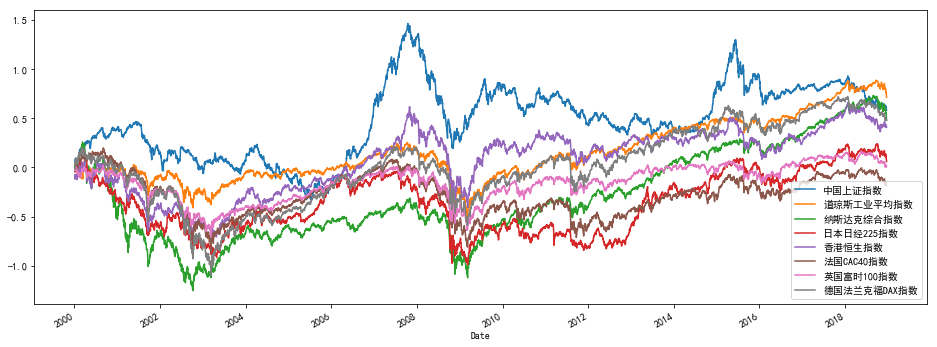

In [105]:
all_index_r.cumsum().plot(figsize=(16,6))

In [106]:
all_index_r.cumsum().iloc[-1,:]

中国上证指数         0.581757
道琼斯工业平均指数      0.713377
纳斯达克综合指数       0.484364
日本日经225指数      0.059418
香港恒生指数         0.411080
法国CAC40指数     -0.189179
英国富时100指数      0.008262
德国法兰克福DAX指数    0.478949
Name: 2018-12-21 00:00:00, dtype: float64

In [107]:
all_index_r.loc['2009-01-01':,:].cumsum().iloc[-1,:]

中国上证指数         0.323491
道琼斯工业平均指数      0.939019
纳斯达克综合指数       1.390231
日本日经225指数      0.822510
香港恒生指数         0.582209
法国CAC40指数      0.377615
英国富时100指数      0.415919
德国法兰克福DAX指数    0.793301
Name: 2018-12-21 00:00:00, dtype: float64

In [108]:
all_index_r.loc['2007-10-16':'2015-06-12',:].cumsum().iloc[-1,:]

中国上证指数        -0.154595
道琼斯工业平均指数      0.246765
纳斯达克综合指数       0.597137
日本日经225指数      0.161820
香港恒生指数        -0.079598
法国CAC40指数     -0.169662
英国富时100指数      0.020910
德国法兰克福DAX指数    0.339982
Name: 2015-06-12 00:00:00, dtype: float64

In [17]:
df=fy.download('^GSPC', start='1990-01-01', end='2018-12-25')

[*********************100%***********************]  1 of 1 downloaded


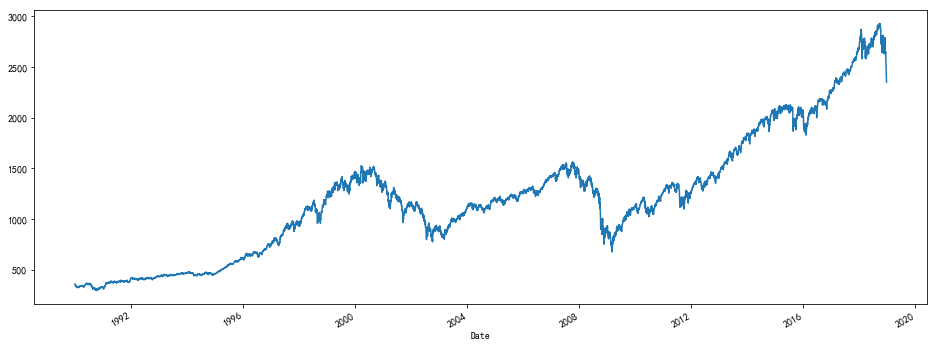

In [18]:
df['Adj Close'].plot(figsize=(16,6))

In [19]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000
1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000
1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000
1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000
1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000
